# Predicting Incomes Using k-Nearest Neighbours and Random Forests
NTU MSIS\
IN6227-2024-Assignment-{1.2}\
Ashiq Kareem\
G2405747J

## Importing census income dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import pandas as pd

file_path = '/content/drive/MyDrive/NTU MSIS/IN6227/adult.data'
df = pd.read_csv(file_path, header=None,
                 names=["age", "workclass", "fnlwgt", "education",
                        "education-num", "marital-status", "occupation",
                        "relationship", "race", "sex", "capital-gain",
                        "capital-loss", "hours-per-week", "native-country",
                        "income"])


## Exploring raw dataset


In [61]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Attribute Type:

*   age -> ratio
*   workclass -> nominal
*   fnlwgt -> ratio
*   education -> ordinal
*   education-num -> ordinal
*   marital-status -> nominal
*   occupation -> nominal
*   relationship -> nominal
*   race -> nominal
*   sex -> nominal
*   capital-gain -> ratio
*   capital-loss -> ratio
*   hours-per-week -> ratio
*   native-country -> nominal
*   income -> class

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.select_dtypes(include='object').nunique()

,0
workclass,9
education,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2
native-country,42
income,2


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

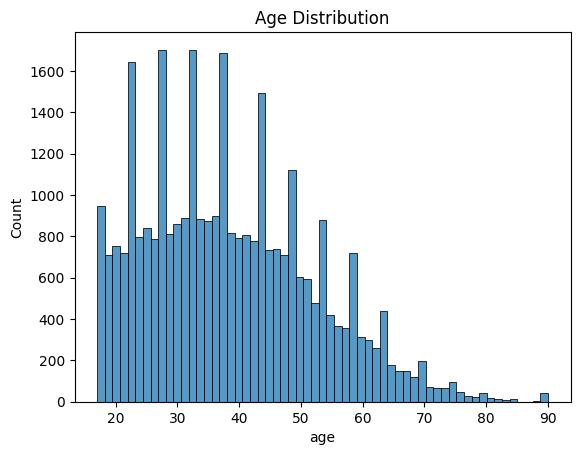

In [ ]:
sns.histplot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


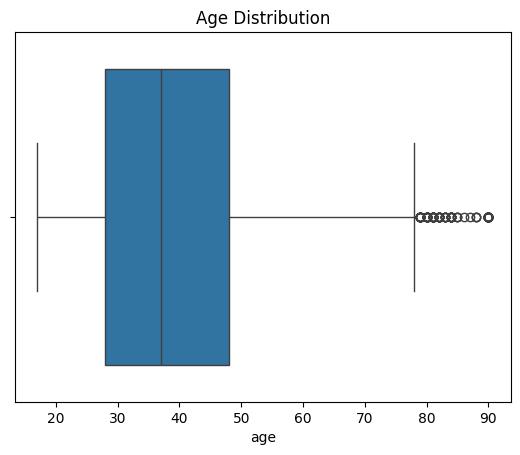

In [ ]:
sns.boxplot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


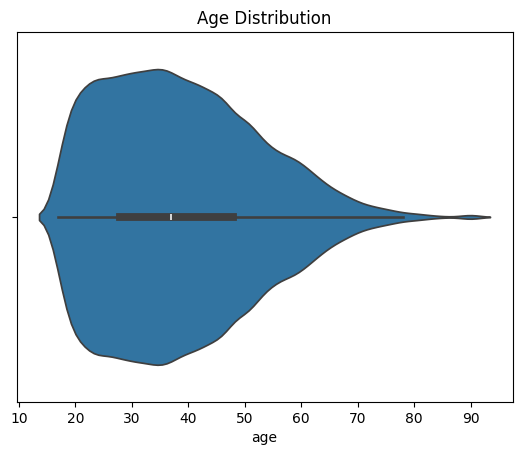

In [ ]:
sns.violinplot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

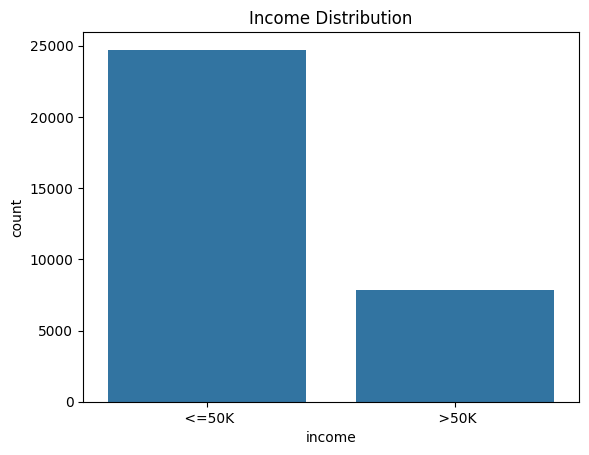

,proportion
income,
<=50K,0.75919
>50K,0.24081


In [ ]:
sns.countplot(data=df, x='income')
plt.title('Income Distribution')
plt.show()

df['income'].value_counts(normalize=True)



---



## Data preprocessing

### Dealing with missing values

Based on the UCI Machine Learning dataset, they mentioned that these 3 features had missing values.


1.   workclass
2.   occupation
3.   native-country



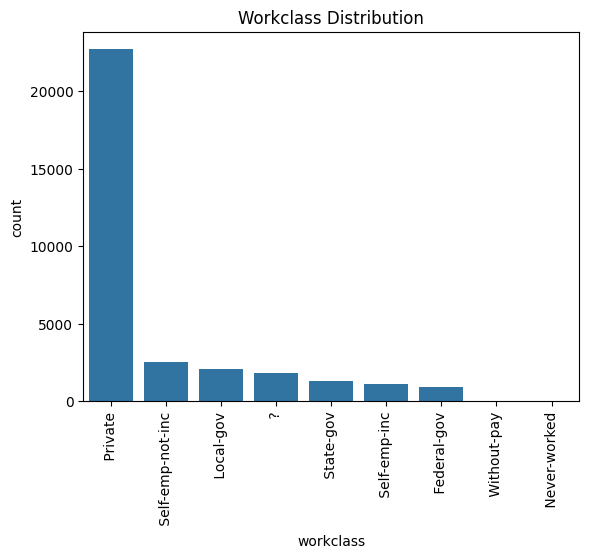

In [ ]:
sns.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index)
plt.title('Workclass Distribution')
plt.xticks(rotation=90)
plt.show()

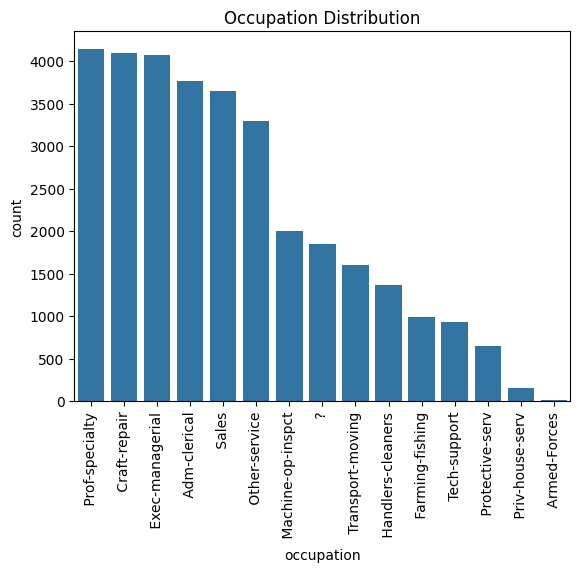

In [ ]:
sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)
plt.title('Occupation Distribution')
plt.xticks(rotation=90)
plt.show()

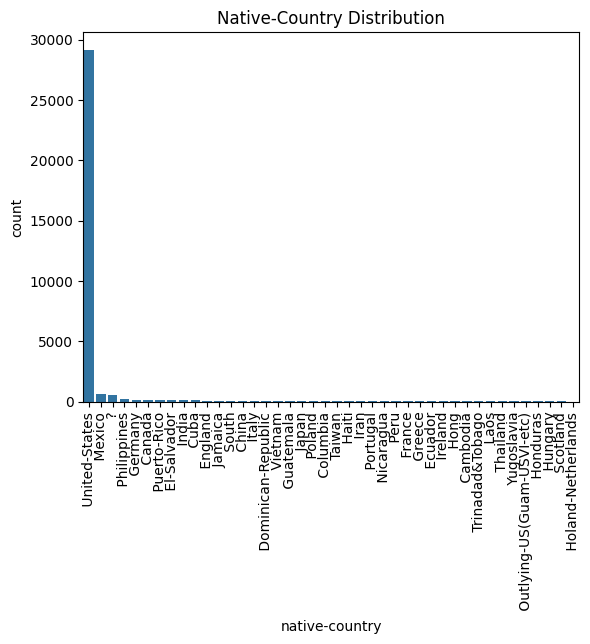

In [ ]:
sns.countplot(data=df, x='native-country', order=df['native-country'].value_counts().index)
plt.title('Native-Country Distribution')
plt.xticks(rotation=90)
plt.show()

In [194]:
# Replacing missing values with the mode of the data

df['workclass'] = df['workclass'].replace(' ?', 'Private')
df['occupation'] = df['occupation'].replace(' ?', 'Prof-speciality')
df['native-country'] = df['native-country'].replace(' ?', 'United States')

### Feature Construction
To deal with the curse of dimensionality, we can combine some of the data within the

In [195]:
df['net-capital'] = df['capital-gain'] - df['capital-loss']

capital_loss_index = df.columns.get_loc('capital-loss')
df.insert(capital_loss_index + 1, 'net-capital', df.pop('net-capital'))

In [196]:
df = df.drop(['capital-gain', 'capital-loss'], axis=1)

In [30]:
df.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,net-capital,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,-1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,40,England,<=50K


### Feature Subset Selection
Dropping unnecessary columns

In [197]:
df = df.drop(['education-num'], axis=1)

In [32]:
df.head(100)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,net-capital,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,-1902,60,United-States,>50K
97,37,Private,202683,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,Divorced,Exec-managerial,Unmarried,White,Female,0,40,England,<=50K


### One hot encoding nominal features

*   workclass
*   marital-status
*   occupation
*   relationship
*   race
*   sex
*   native-country
*   income

In [198]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
encoder = OneHotEncoder(sparse_output=False, drop='first')
ohe = encoder.fit_transform(df[nominal_features])
ohe_df = pd.DataFrame(ohe, columns=encoder.get_feature_names_out(nominal_features))
ohe_df = pd.concat([df, ohe_df], axis=1)
ohe_df = ohe_df.drop(nominal_features, axis=1)

### Ordinal encoding ordinal features

*   education

In [63]:
education_importance

,education,education-num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Masters,14
4,9th,5
5,Some-college,10
6,Assoc-acdm,12
7,Assoc-voc,11
8,7th-8th,4
9,Doctorate,16


In [199]:
education_order = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',
                   ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate']

In [200]:
encoder = OrdinalEncoder(categories=[education_order])
ohe_df['education'] = encoder.fit_transform(ohe_df[['education']])

In [71]:
ohe_df.head()

,age,fnlwgt,education,net-capital,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United States,income_ >50K
0,39,77516,12.0,2174,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,83311,12.0,0,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38,215646,8.0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,6.0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,12.0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### MinMaxScaling ratio features

*   age
*   fnlwgt
*   net-capital
*   hours-per-week




In [201]:
scaler = MinMaxScaler()
ratio_features = ['age', 'fnlwgt', 'net-capital', 'hours-per-week']
ohe_df[ratio_features] = scaler.fit_transform(ohe_df[ratio_features])

In [202]:
ohe_df

,age,fnlwgt,education,net-capital,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_United States,income_ >50K
0,0.301370,0.044302,12.0,0.062575,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.452055,0.048238,12.0,0.041742,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.287671,0.138113,8.0,0.041742,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.493151,0.151068,6.0,0.041742,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.150685,0.221488,12.0,0.041742,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,11.0,0.041742,0.377551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,0.315068,0.096500,8.0,0.041742,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32558,0.561644,0.094827,8.0,0.041742,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,0.068493,0.128499,8.0,0.041742,0.193878,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Implementation and optimisation of models

### KNN Implementation

In [213]:
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure time taken
start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time_knn
start_time_knn_pred = time.time()
knn_pred = knn.predict(X_test)
knn_pred_time = time.time() - start_time_knn_pred

# Calculate metrics
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='weighted')
recall = recall_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, knn_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", knn_train_time)
print("Prediction Time:", knn_pred_time)

Detailed Metrics:
Accuracy: 0.8120681713496085
Precision: 0.8075048652364667
Recall: 0.8120681713496085
F1 Score: 0.8094640375677069
Confusion Matrix:
 [[4390  552]
 [ 672  899]]
Training Time: 0.05763721466064453
Prediction Time: 5.5702855587005615


### KNN Optimisation

In [209]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # k values
    'metric': ['euclidean', 'manhattan', 'minkowski']  # distance metrics
}

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Final training with the best parameters on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best Cross-Validation Score: 0.8301983168803145
Detailed Metrics:
Accuracy: 0.833256563795486
Precision: 0.8263032842752625
Recall: 0.833256563795486
F1 Score: 0.8283840885519836
Confusion Matrix:
 [[4518  424]
 [ 662  909]]


In [216]:
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure time taken
start_time_knn = time.time()
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9)
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time_knn
start_time_knn_pred = time.time()
knn_pred = knn.predict(X_test)
knn_pred_time = time.time() - start_time_knn_pred

# Calculate metrics
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='weighted')
recall = recall_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, knn_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", knn_train_time)
print("Prediction Time:", knn_pred_time)

Detailed Metrics:
Accuracy: 0.833256563795486
Precision: 0.8263032842752625
Recall: 0.833256563795486
F1 Score: 0.8283840885519836
Confusion Matrix:
 [[4518  424]
 [ 662  909]]
Training Time: 0.028715133666992188
Prediction Time: 18.947060346603394


### RF Implementation

In [217]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure time taken
start_time_rf = time.time()
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time_rf
start_time_rf_pred = time.time()
rf_pred = rf.predict(X_test)
rf_pred_time = time.time() - start_time_rf_pred

# Calculate metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", rf_train_time)
print("Prediction Time:", rf_pred_time)

Detailed Metrics:
Accuracy: 0.8607400583448488
Precision: 0.8557203878203886
Recall: 0.8607400583448488
F1 Score: 0.8568429390506654
Confusion Matrix:
 [[4603  339]
 [ 568 1003]]
Training Time: 53.69478678703308
Prediction Time: 1.7050681114196777


### RF Optimisation

In [210]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Final training with the best parameters on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.8632910336421276
Detailed Metrics:
Accuracy: 0.8639643789344388
Precision: 0.8584652034202147
Recall: 0.8639643789344388
F1 Score: 0.8582619313531114
Confusion Matrix:
 [[4662  280]
 [ 606  965]]


In [218]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split data into training and testing sets
X = ohe_df.iloc[:, :-1]
y = ohe_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Measure time taken
start_time_rf = time.time()
rf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time_rf
start_time_rf_pred = time.time()
rf_pred = rf.predict(X_test)
rf_pred_time = time.time() - start_time_rf_pred

# Calculate metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
f1 = f1_score(y_test, rf_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_pred)

# Print detailed metrics
print("Detailed Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Training Time:", rf_train_time)
print("Prediction Time:", rf_pred_time)

Detailed Metrics:
Accuracy: 0.8639643789344388
Precision: 0.8584652034202147
Recall: 0.8639643789344388
F1 Score: 0.8582619313531114
Confusion Matrix:
 [[4662  280]
 [ 606  965]]
Training Time: 5.9235241413116455
Prediction Time: 0.1990509033203125
